# A relatively basic approach

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

#I'm using sklearn for NN <- this is not the best implementation, you should use keras/pytorch instead
from sklearn.datasets import fetch_openml
from sklearn.exceptions import ConvergenceWarning
from sklearn.neural_network import MLPClassifier

import numpy as np

In [2]:
#really, really small dataset for this
breast_cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(breast_cancer['data'], breast_cancer['target'])

In [3]:
from sklearn import preprocessing
# applying standardization to my dataset
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
# multi layer perceptron classifier, 2x15 neuron hidden layers, solver = stochastic gradient descent (don't worry about this for now)
# verbose -> how much the model "speaks" back to us. Very useful to have when learning, very useful to shut up when we know what we are doing
# max_iter -> how many "epochs" we run, i.e. how many times do we see all the data

nn = MLPClassifier(
    hidden_layer_sizes= (15,15),
    solver='sgd',
    verbose=10,
    max_iter=200,
    random_state=1
)

In [5]:
nn.fit(X_train, y_train)

print("Training set score: %f" % nn.score(X_train, y_train))
print("Test set score: %f" % nn.score(X_test, y_test))

Iteration 1, loss = 0.82539009
Iteration 2, loss = 0.81539282
Iteration 3, loss = 0.79955545
Iteration 4, loss = 0.78000806
Iteration 5, loss = 0.75995981
Iteration 6, loss = 0.73942157
Iteration 7, loss = 0.71929150
Iteration 8, loss = 0.69851548
Iteration 9, loss = 0.67931291
Iteration 10, loss = 0.66086811
Iteration 11, loss = 0.64385584
Iteration 12, loss = 0.62774692
Iteration 13, loss = 0.61384193
Iteration 14, loss = 0.60070094
Iteration 15, loss = 0.58830531
Iteration 16, loss = 0.57681882
Iteration 17, loss = 0.56590952
Iteration 18, loss = 0.55574245
Iteration 19, loss = 0.54570459
Iteration 20, loss = 0.53625013
Iteration 21, loss = 0.52701340
Iteration 22, loss = 0.51834889
Iteration 23, loss = 0.50985058
Iteration 24, loss = 0.50160465
Iteration 25, loss = 0.49343525
Iteration 26, loss = 0.48564331
Iteration 27, loss = 0.47777332
Iteration 28, loss = 0.47002002
Iteration 29, loss = 0.46249590
Iteration 30, loss = 0.45493725
Iteration 31, loss = 0.44757804
Iteration 32, los

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# With a more serious library

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

INFO: pip is looking at multiple versions of tensorflow to determine which version is compatible with other requirements. This could take a while.
  Using cached wheel-0.45.1-py3-none-any.whl.metadata (2.3 kB)
  Using cached Markdown-3.7-py3-none-any.whl.metadata (7.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 MB 10.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 5.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 10.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 10.4 MB/s eta 0:00:00a 0:00:01
Using cached typing_extensions-4.5.0-py3-none-any.whl (27 kB)
Using cached Markdown-3.7-py3-none-any.whl (106 kB)
Using cached wheel-0.45.1-py3-none-any.whl (72 kB)
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.2.3
    Uninstalling urllib3-2.2.3:
      Successfully unin

In [14]:
# find mnist here:  https://www.kaggle.com/vikramtiwari/mnist-numpy
def load_data(path):
    with np.load(path) as f:
        x_train, y_train = f['x_train'], f['y_train']
        x_test, y_test = f['x_test'], f['y_test']
        return (x_train, y_train), (x_test, y_test)

(x_train, y_train), (x_test, y_test) = load_data('../05_ml/data/mnist.npz')

In [15]:
x_train.shape

(60000, 28, 28)

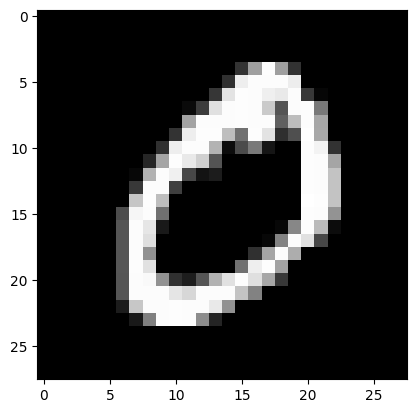

0

(28, 28)

In [16]:
import matplotlib.pyplot as plt

plt.imshow(x_train[1], cmap = 'gray')
plt.show()
display(y_train[1])
display(x_train[1].shape)

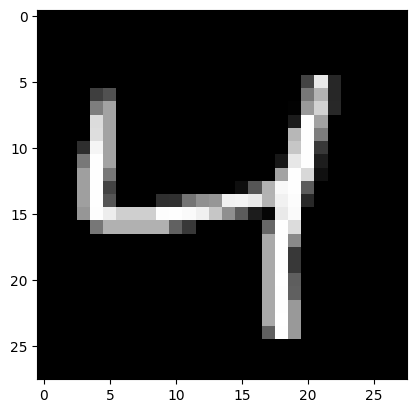

4

(28, 28)

In [17]:
plt.imshow(x_train[2], cmap = 'gray')
plt.show()
display(y_train[2])
display(x_train[2].shape)

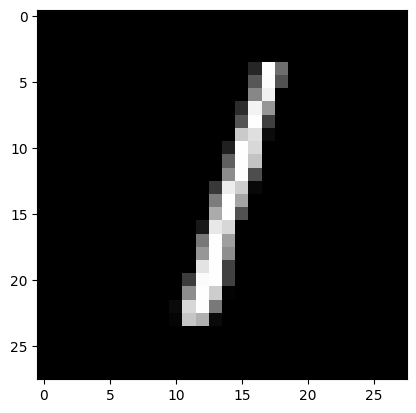

1

(28, 28)

In [18]:
plt.imshow(x_test[2], cmap = 'gray')
plt.show()
display(y_test[2])
display(x_test[2].shape)

In [19]:
print(x_train.shape)
x_train[1]

(60000, 28, 28)


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [20]:
(60000, 784)

(60000, 784)

In [22]:
# Normalize the images. It works better for backpropagation
x_train = (x_train / 255)
x_test_original = x_test
x_test = (x_test / 255)

# Flatten the images. Images are to be input as vector
x_train = x_train.reshape((-1, 784))
x_test = x_test.reshape((-1, 784))

In [24]:
print(x_train.shape)
x_train[10]

(60000, 784)


array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [25]:
pd.DataFrame(x_train).head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
# Build the model.
model = Sequential([ # as far as we know, all networks are sequential
  Dense(64, activation='relu', input_shape=(784,)), # 784= 28*28 dense networks means all neurons in one layer are connected to all neuronsof the next layer
  Dense(64, activation='relu'),      # choosing relu instead of sigmoid, this is somewhat common
  Dense(10, activation='softmax'),   # the softmax actiavation is the last one to compensate for the high volume additions
])

# Compile the model.
model.compile(
  optimizer='adam', #here we could use stochastic gradient descent, but adam is a de facto standard
  loss='categorical_crossentropy', #this is how we create the original blam to play the blame game
  metrics=['accuracy'],
)

In [27]:
# Train the model.
history = model.fit(
  x_train,
  to_categorical(y_train), # just to make sure the outputs are not considered numeric (because, ya know, they are numbers...)
  epochs=5, # go 5 times through the whole dataset
  batch_size=32, # send 32 images at a time before you tweak the network again, to make it faster
)

Epoch 1/5
1875/1875 [==============================] - 1s 608us/step - loss: 0.9168 - accuracy: 0.7233
Epoch 2/5
1875/1875 [==============================] - 1s 589us/step - loss: 0.4389 - accuracy: 0.8703
Epoch 3/5
1875/1875 [==============================] - 1s 599us/step - loss: 0.3757 - accuracy: 0.8904
Epoch 4/5
1875/1875 [==============================] - 1s 594us/step - loss: 0.3351 - accuracy: 0.9032
Epoch 5/5
1875/1875 [==============================] - 1s 598us/step - loss: 0.3003 - accuracy: 0.9136


In [28]:
# Evaluate the model.
model.evaluate(
  x_test,
  to_categorical(y_test)
)

313/313 [==============================] - 0s 356us/step - loss: 0.2800 - accuracy: 0.9174


[0.28001779317855835, 0.9174000024795532]

In [29]:
# Predict on the first 5 test images.
predictions = model.predict(x_test[:5])

# Print our model's predictions.
print(np.argmax(predictions, axis=1))

1/1 [==============================] - 0s 40ms/step
[7 2 1 0 4]


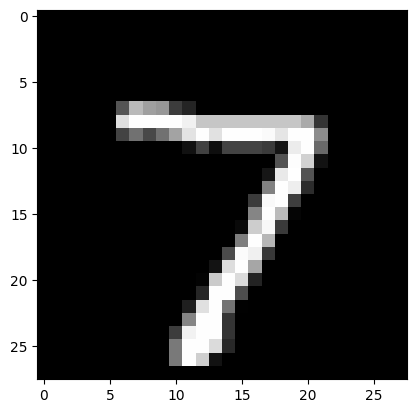

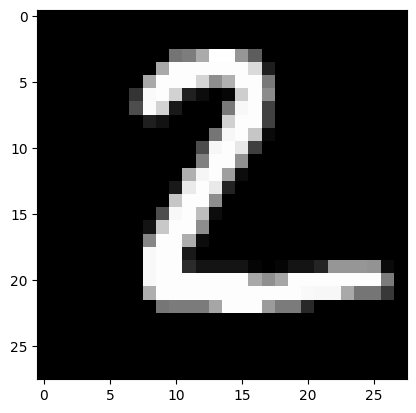

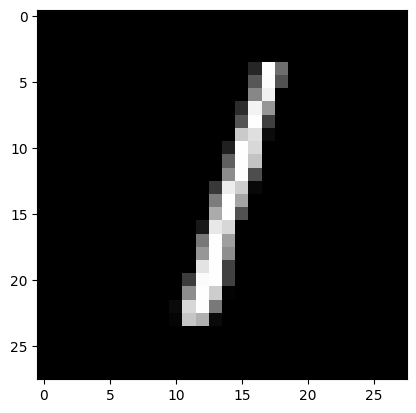

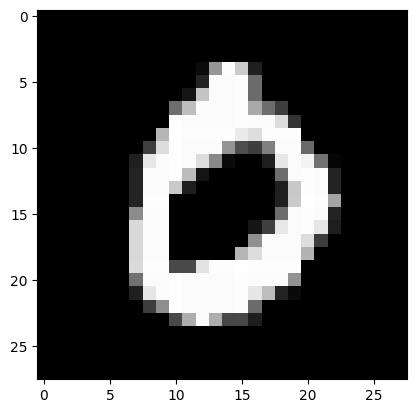

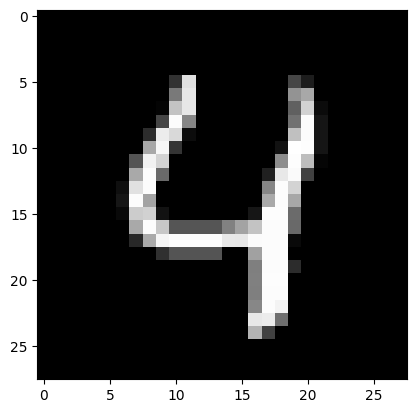

In [34]:
for i in range(5):
  plt.imshow(x_test_original[i].reshape(28, 28), cmap = 'gray')
  plt.show()

# Check errors

In [35]:
some_errors = list(map(np.argmax,model.predict(x_test[200:300])))-y_test[200:300]
some_errors

4/4 [==============================] - 0s 807us/step


array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  2,  0, -2,  0,  0,  0,
        4,  0,  0,  0,  0,  0,  0,  0, -6,  0, -2,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -4,  0,  0,  0,  0,  0,  0,  0,  0,  0])

In [36]:
list(some_errors).index(-2)

47

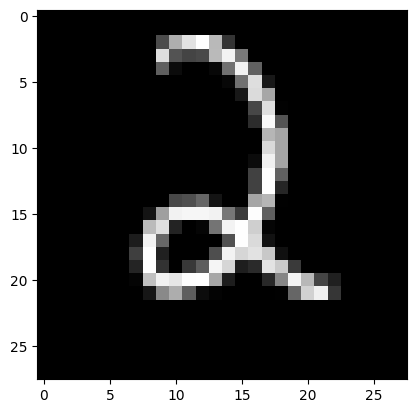

In [38]:
plt.imshow(x_test_original[47].reshape(28, 28), cmap = 'gray')
plt.show()

In [39]:
model.predict(x_test[:3])

1/1 [==============================] - 0s 13ms/step


array([[1.5864363e-04, 3.5393192e-08, 1.4853838e-04, 2.5929532e-03,
        1.4873207e-07, 2.0330526e-05, 5.4833266e-10, 9.9377441e-01,
        7.9699121e-06, 3.2969003e-03],
       [4.2410530e-03, 2.5053193e-06, 9.6820807e-01, 2.0616915e-02,
        1.3691145e-10, 2.4720887e-03, 3.2881591e-03, 5.4888521e-11,
        1.1711838e-03, 3.2961817e-11],
       [7.3945904e-07, 9.7638035e-01, 1.0618423e-02, 5.9644105e-03,
        3.6920881e-04, 5.2531430e-04, 1.3935748e-03, 2.7065696e-03,
        1.9292813e-03, 1.1210814e-04]], dtype=float32)

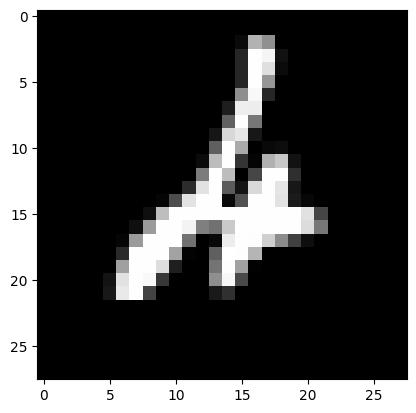

In [41]:
plt.imshow(x_test_original[247].reshape(28,28), cmap = 'gray')
plt.show()

In [42]:
y_test[247]

4

In [43]:
np.argmax(model.predict(np.array([x_test[247]])))

1/1 [==============================] - 0s 11ms/step


2